# Problem Statement

A transport or logistics company (Uber) wants to segment its drivers based on their driving behavior to:
*Reward safe drivers
*Identify risky drivers
*optimize training and resource allocation

They collect daily telematics data such as:
*Average distance driven
*Overspeeding frequency

In [7]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/JangirSumit/kmeans-clustering/refs/heads/master/driver-data.csv"
df = pd.read_csv(url)

# Preview data
print(df.head())
print(df.describe())


           id  mean_dist_day  mean_over_speed_perc
0  3423311935          71.24                    28
1  3423313212          52.53                    25
2  3423313724          64.54                    27
3  3423311373          55.69                    22
4  3423310999          54.58                    25
                 id  mean_dist_day  mean_over_speed_perc
count  4.000000e+03    4000.000000           4000.000000
mean   3.423312e+09      76.041522             10.721000
std    1.154845e+03      53.469563             13.708543
min    3.423310e+09      15.520000              0.000000
25%    3.423311e+09      45.247500              4.000000
50%    3.423312e+09      53.330000              6.000000
75%    3.423313e+09      65.632500              9.000000
max    3.423314e+09     244.790000            100.000000


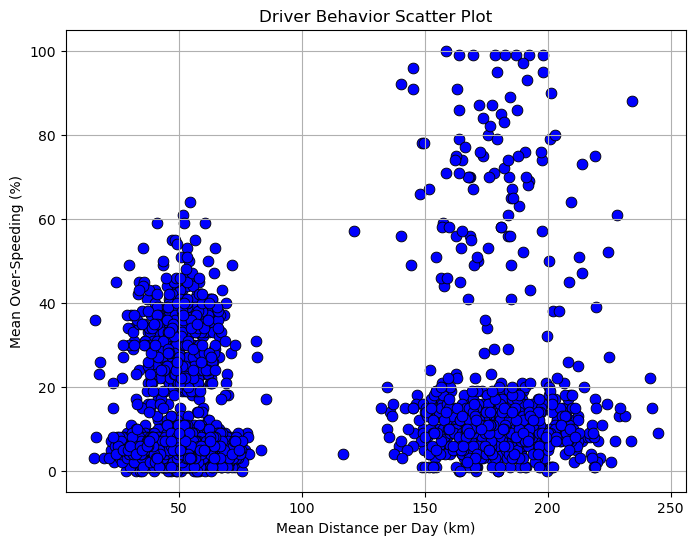

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='mean_dist_day', y='mean_over_speed_perc', s=60, color='blue', edgecolor='black')
plt.title('Driver Behavior Scatter Plot')
plt.xlabel('Mean Distance per Day (km)')
plt.ylabel('Mean Over-Speeding (%)')
plt.grid(True)
plt.show()


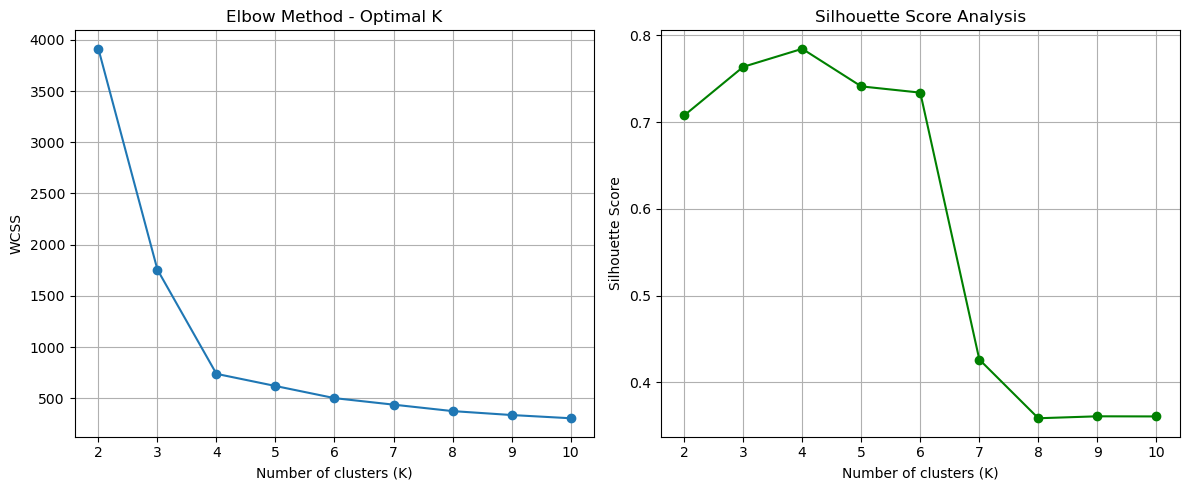

4

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


# Select features for clustering
X = df[['mean_dist_day', 'mean_over_speed_perc']]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method to determine the optimal number of clusters
wcss = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot WCSS (Elbow Method)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Method - Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score Analysis')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

# Return best K based on max silhouette score
optimal_k = K_range[silhouette_scores.index(max(silhouette_scores))]
optimal_k



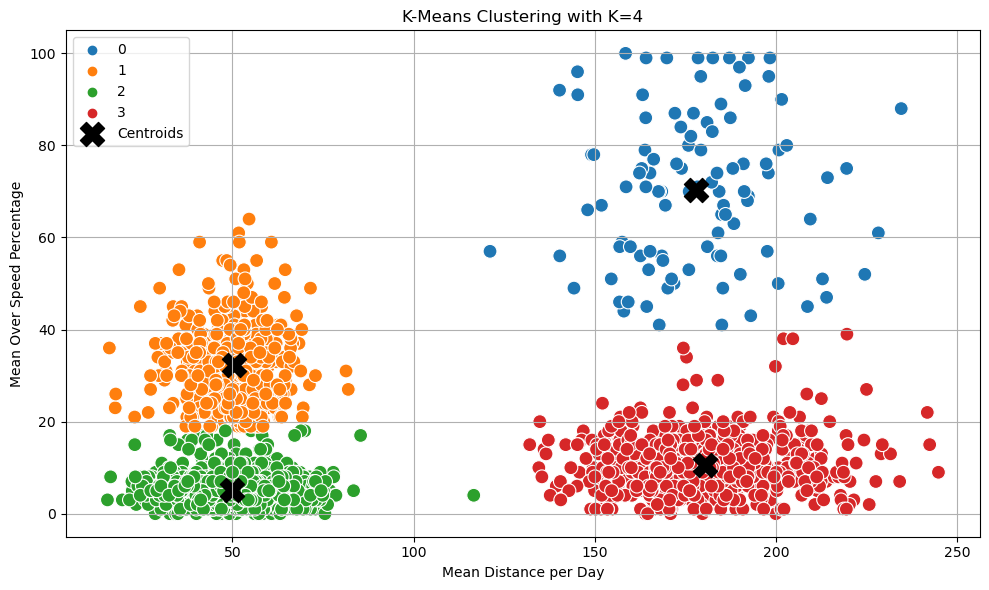

In [6]:

# Apply KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='mean_dist_day', y='mean_over_speed_perc', hue='Cluster', palette='tab10', s=100)
plt.scatter(scaler.inverse_transform(kmeans.cluster_centers_)[:, 0],
            scaler.inverse_transform(kmeans.cluster_centers_)[:, 1],
            s=300, c='black', marker='X', label='Centroids')
plt.title('K-Means Clustering with K=4')
plt.xlabel('Mean Distance per Day')
plt.ylabel('Mean Over Speed Percentage')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Analysis

Here's the visualization of K-Means clustering (K=4) based on mean distance per day and mean over speed percentage for the Uber driver dataset.

## Observations from the Cluster Plot:

### Cluster 0 (Bottom-left):

Drivers in this group have low mean distance and low over-speed percentage.
Likely occasional or part-time drivers who drive less and tend to follow speed regulations.

### Cluster 1 (Top-right):

High mean distance and high over-speed percentage.
These may be high-risk or aggressive full-time drivers who drive a lot and often overspeed.

### Cluster 2 (Bottom-right):

High mean distance but low over-speed percentage.
Likely experienced full-time drivers who cover long distances but maintain safe speeds.

### Cluster 3 (Top-left):

Low mean distance but high over-speed percentage.
Possibly reckless or impatient short-distance drivers—drive less but frequently overspeed.

This clustering can be used to identify and manage driver behavior (e.g., targeting aggressive drivers for safety training or giving rewards to safe long-distance drivers).

# Clustring using Hierarchy Clustering

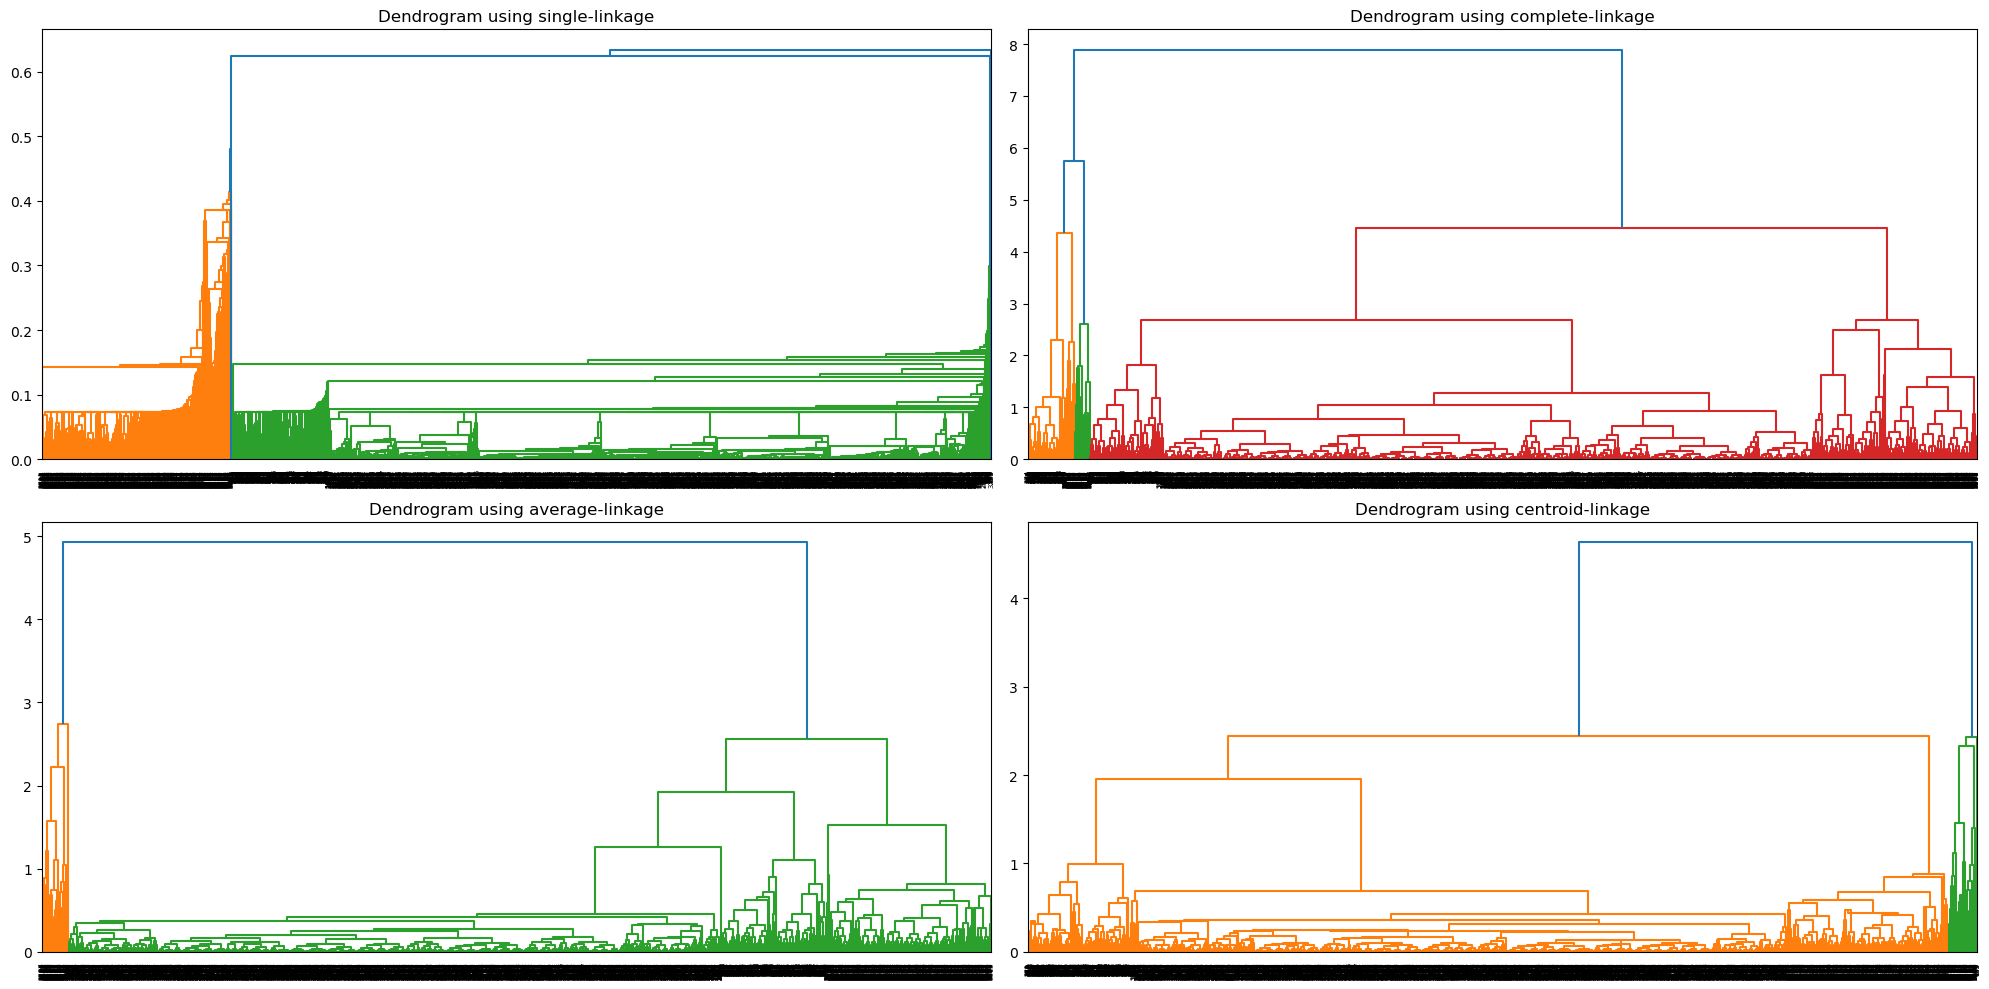

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import scipy.cluster.hierarchy as sch


# Linkage methods to analyze
linkage_methods = ['single', 'complete', 'average', 'centroid']

# Plotting dendrograms
plt.figure(figsize=(20, 10))
for i, method in enumerate(linkage_methods):
    plt.subplot(2, 2, i + 1)
    linked = linkage(X_scaled, method=method) 
    dendrogram(linked,
               orientation='top',
               distance_sort='descending',
               show_leaf_counts=True)
    plt.title(f'Dendrogram using {method}-linkage')
plt.tight_layout()
plt.show()